Rate of unnamed pets in train data: 8.4173%.
Rate of pure breed pets in training_set data: 71.7802%.


Text(0.5, 1.0, 'AdoptionSpeed by Type and Word Count in Description')

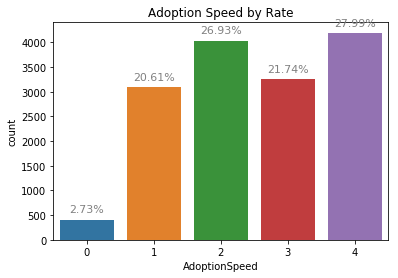

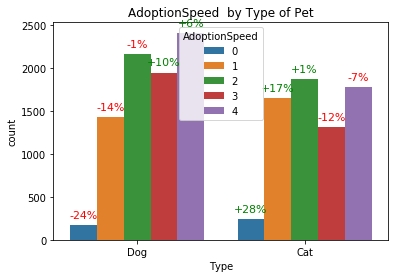

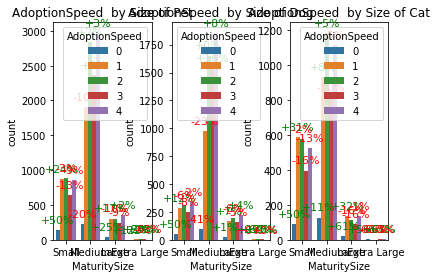

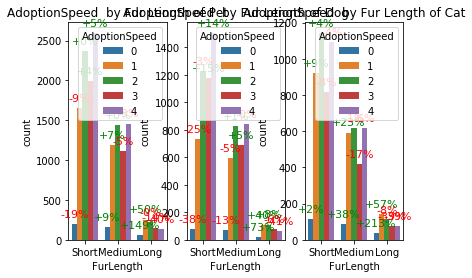

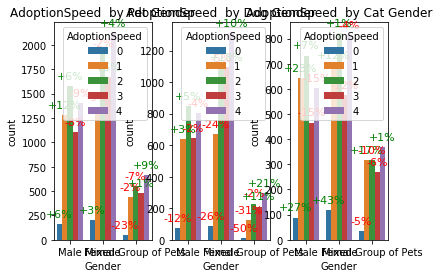

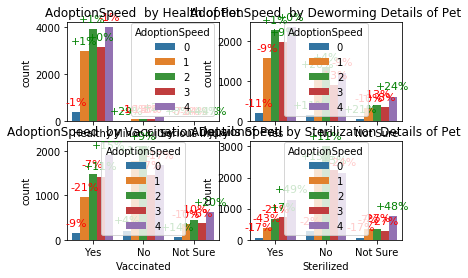

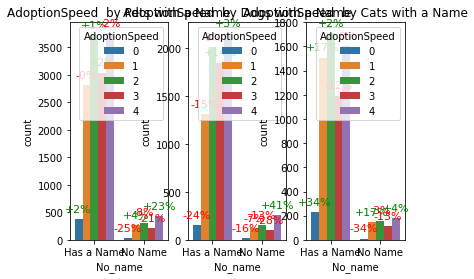

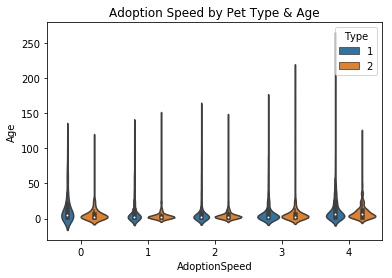

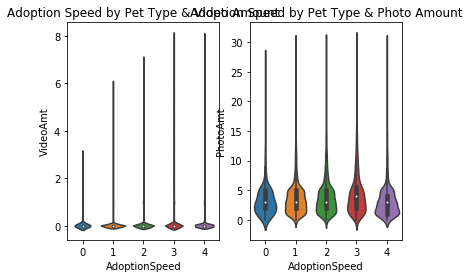

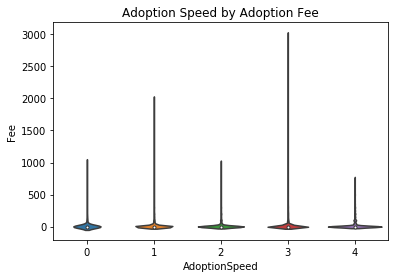

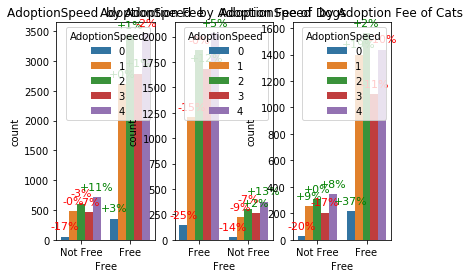

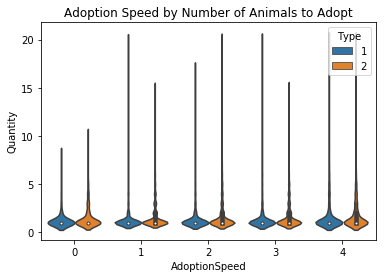

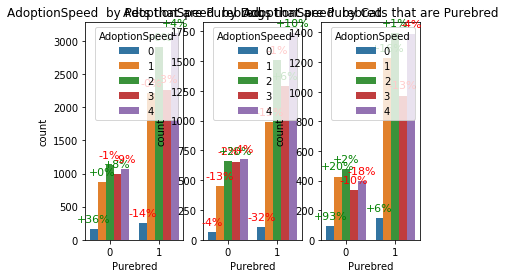

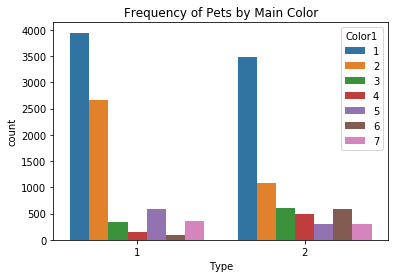

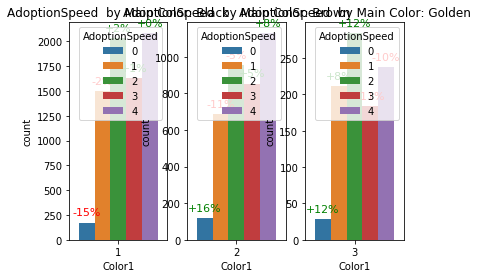

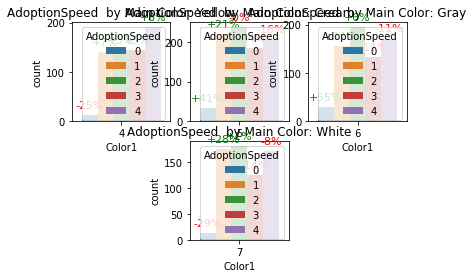

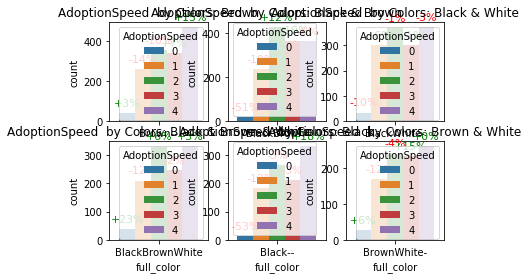

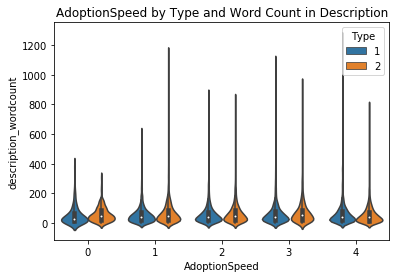

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 24 10:16:12 2019

@author: zkana
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

training_set = pd.read_csv('train.csv', na_values = [""])

main_count = training_set['AdoptionSpeed'].value_counts(normalize=True).sort_index()

def prepare_plot_dict(df, col, main_count):
    """
    Preparing dictionary with data for plotting.
    
    I want to show how much higher/lower are the rates of Adoption speed for the current column comparing to base values (as described higher),
    At first I calculate base rates, then for each category in the column I calculate rates of Adoption speed and find difference with the base rates.
    
    """
    main_count = dict(main_count)
    plot_dict = {}
    for i in df[col].unique():
        val_count = dict(df.loc[df[col] == i, 'AdoptionSpeed'].value_counts().sort_index())

        for k, v in main_count.items():
            if k in val_count:
                plot_dict[val_count[k]] = ((val_count[k] / sum(val_count.values())) / main_count[k]) * 100 - 100
            else:
                plot_dict[0] = 0

    return plot_dict

def make_countplot(df, x, hue='AdoptionSpeed', title='', main_count=main_count):
    """
    Plotting countplot with correct annotations.
    """
    g = sns.countplot(x=x, data=df, hue=hue);
    plt.title(f'AdoptionSpeed {title}');
    ax = g.axes

    plot_dict = prepare_plot_dict(df, x, main_count)

    for p in ax.patches:
        h = p.get_height() if str(p.get_height()) != 'nan' else 0
        text = f"{plot_dict[h]:.0f}%" if plot_dict[h] < 0 else f"+{plot_dict[h]:.0f}%"
        ax.annotate(text, (p.get_x() + p.get_width() / 2., h),
             ha='center', va='center', fontsize=11, color='green' if plot_dict[h] > 0 else 'red', rotation=0, xytext=(0, 10),
             textcoords='offset points')

"""Adoption Rate"""
plt.figure()
adoptionrate = sns.countplot(x="AdoptionSpeed", data = training_set)
ax = adoptionrate.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / training_set.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points')
plt.title('Adoption Speed by Rate')

"""Type: Cat/Dog"""
plt.figure()
make_countplot(df = training_set, x = "Type", title = " by Type of Pet")
plt.xticks(ticks = [0,1], labels = ['Dog','Cat'])

""" Maturity Size/Full Grown Size """
plt.figure()
plt.subplot(1,3,1)
make_countplot(df = training_set, x = "MaturitySize", title = " by Size of Pet")
plt.xticks(ticks = [0,1,2,3], labels = ['Small','Medium','Large','Extra Large'])
plt.subplot(1,3,2)
make_countplot(df = training_set.loc[training_set["Type"]==1],x = "MaturitySize",title = " by Size of Dog")
plt.xticks(ticks = [0,1,2,3], labels = ['Small','Medium','Large','Extra Large'])
plt.subplot(1,3,3)
make_countplot(df = training_set.loc[training_set["Type"]==2],x = "MaturitySize",title = " by Size of Cat")
plt.xticks(ticks = [0,1,2,3], labels = ['Small','Medium','Large','Extra Large'])

"""Fur Length"""
plt.figure()
plt.subplot(1,3,1)
make_countplot(df = training_set, x = "FurLength", title = " by Fur Length of Pet")
plt.xticks(ticks = [0,1,2], labels = ['Short','Medium','Long'])
plt.subplot(1,3,2)
make_countplot(df = training_set.loc[training_set["Type"]==1], x = "FurLength", title = " by Fur Length of Dog")
plt.xticks(ticks = [0,1,2], labels = ['Short','Medium','Long'])
plt.subplot(1,3,3)
make_countplot(df = training_set.loc[training_set["Type"]==2], x = "FurLength", title = " by Fur Length of Cat")
plt.xticks(ticks = [0,1,2], labels = ['Short','Medium','Long'])

"""Gender"""
plt.figure()
plt.subplot(1,3,1)
make_countplot(df = training_set, x = "Gender", title = " by Pet Gender")
plt.xticks(ticks = [0,1,2], labels = ['Male','Female','Mixed Group of Pets'])
plt.subplot(1,3,2)
make_countplot(df = training_set.loc[training_set["Type"]==1], x = "Gender", title = " by Dog Gender")
plt.xticks(ticks = [0,1,2], labels = ['Male','Female','Mixed Group of Pets'])
plt.subplot(1,3,3)
make_countplot(df = training_set.loc[training_set["Type"]==2], x = "Gender", title = " by Cat Gender")
plt.xticks(ticks = [0,1,2], labels = ['Male','Female','Mixed Group of Pets'])

"""Health"""
plt.figure()
plt.subplot(2,2,1)
make_countplot(df = training_set, x = "Health", title = " by Health of Pet")
plt.xticks(ticks = [0,1,2], labels = ['Healthy','Minor Injury','Serious Injury'])
plt.subplot(2,2,2)
make_countplot(df = training_set, x = "Dewormed", title = " by Deworming Details of Pet")
plt.xticks(ticks = [0,1,2], labels = ['Yes','No','Not Sure'])
plt.subplot(2,2,3)
make_countplot(df = training_set, x = "Vaccinated", title = " by Vaccination Details of Pet")
plt.xticks(ticks = [0,1,2], labels = ['Yes','No','Not Sure'])
plt.subplot(2,2,4)
make_countplot(df = training_set, x = "Sterilized", title = "by Sterilization Details of Pet")
plt.xticks(ticks = [0,1,2], labels = ['Yes','No','Not Sure'])

"""Name"""
#plt.figure()
#plt.subplot(1, 2, 1)
#text_cat = ' '.join(training_set['Name'][np.where(training_set['Type'] == 2)[0]].fillna('').tolist())
#wordcloud = WordCloud(max_font_size=None, min_font_size = 10, 
#                      background_color='white',
#                      width=1000, height=1000).generate(text_cat)
#plt.imshow(wordcloud)
#
#plt.subplot(1, 2, 2)
#text_dog = ' '.join(training_set['Name'][np.where(training_set['Type'] == 1)[0]].fillna('').tolist())
#wordcloud = WordCloud(width = 1000, height = 1000, 
#                background_color ='white', 
#                min_font_size = 10, max_font_size = None).generate(text_dog)
#plt.imshow(wordcloud)

training_set['Name'] = training_set['Name'].fillna('Unnamed')
training_set['No_name'] = 0
training_set.loc[training_set['Name'] == 'Unnamed', 'No_name'] = 1
print(f"Rate of unnamed pets in train data: {training_set['No_name'].sum() * 100 / training_set['No_name'].shape[0]:.4f}%.")
pd.crosstab(training_set['No_name'], training_set['AdoptionSpeed'], normalize='index')

plt.figure()
plt.subplot(1,3,1)
make_countplot(df = training_set, x = 'No_name', title = " by Pets with a Name")
plt.xticks(ticks = [0,1], labels = ['Has a Name','No Name'])
plt.subplot(1,3,2)
make_countplot(df = training_set.loc[training_set["Type"]==1], x = 'No_name', title = " by Dogs with a Name")
plt.xticks(ticks = [0,1], labels = ['Has a Name','No Name'])
plt.subplot(1,3,3)
make_countplot(df = training_set.loc[training_set["Type"]==2], x = 'No_name', title = " by Cats with a Name")
plt.xticks(ticks = [0,1], labels = ['Has a Name','No Name'])

"""Age"""
plt.figure()
sns.violinplot(x="AdoptionSpeed",y="Age",hue="Type", data = training_set)
plt.title("Adoption Speed by Pet Type & Age")

"""Media"""
plt.figure()
plt.subplot(1,2,1)
sns.violinplot(x="AdoptionSpeed",y="VideoAmt", data = training_set)
plt.title("Adoption Speed by Pet Type & Video Amount")
plt.subplot(1,2,2)
sns.violinplot(x="AdoptionSpeed",y="PhotoAmt", data = training_set)
plt.title("Adoption Speed by Pet Type & Photo Amount")

"""Fee"""
plt.figure()
sns.violinplot(x="AdoptionSpeed",y="Fee", data = training_set)
plt.title("Adoption Speed by Adoption Fee")
training_set['Free'] = training_set['Fee'].apply(lambda x: 'Free' if x == 0 else 'Not Free')
plt.figure()
plt.subplot(1,3,1)
make_countplot(df = training_set, x = "Free", title = " by Adoption Fee")
plt.subplot(1,3,2)
make_countplot(df = training_set[training_set["Type"]==1], x = "Free", title = " by Adoption Fee of Dogs")
plt.subplot(1,3,3)
make_countplot(df = training_set[training_set["Type"]==2], x = "Free", title = " by Adoption Fee of Cats")
plt.xticks(ticks = [0,1], labels = ['Not Free','Free'])

"""Quantity"""
plt.figure()
sns.violinplot(x="AdoptionSpeed",y="Quantity", hue="Type", data = training_set)
plt.title("Adoption Speed by Number of Animals to Adopt")

"""Breed"""
training_set['Purebred'] = 0
training_set.loc[training_set['Breed2'] == 0, 'Purebred'] = 1
print(f"Rate of pure breed pets in training_set data: {training_set['Purebred'].sum() * 100 / training_set['Purebred'].shape[0]:.4f}%.")
pd.crosstab(training_set['Purebred'], training_set['AdoptionSpeed'], normalize='index')
plt.figure()
plt.subplot(1,3,1)
make_countplot(df = training_set, x = 'Purebred', title = " by Pets that are Purebred")
plt.subplot(1,3,2)
make_countplot(df = training_set.loc[training_set["Type"]==1], x = 'Purebred', title = " by Dogs that are Purebred")
plt.subplot(1,3,3)
make_countplot(df = training_set.loc[training_set["Type"]==2], x = 'Purebred', title = " by Cats that are Purebred")

df_BreedName = pd.read_csv('breed_labels.csv')
breeds_dict = {k: v for k, v in zip(df_BreedName['BreedID'], df_BreedName['BreedName'])}
training_set['Breed1_name'] = training_set['Breed1'].apply(lambda x: '_'.join(breeds_dict[x].split()) if x in breeds_dict else 'Unknown')
training_set['Breed2_name'] = training_set['Breed2'].apply(lambda x: '_'.join(breeds_dict[x].split()) if x in breeds_dict else '-')
(training_set['Breed1_name'] + " & " + training_set['Breed2_name']).value_counts().head(30)
#results from this show that the animals are not actually purebred, they just have mixed breed listed!

"""Color"""
plt.figure()
sns.countplot(x="Type", hue = "Color1", data = training_set)
plt.title ("Frequency of Pets by Main Color")

plt.figure()
plt.subplot(1,3,1)
make_countplot(df = training_set.loc[training_set["Color1"]==1], x = "Color1", title = " by Main Color: Black")
plt.subplot(1,3,2)
make_countplot(df = training_set.loc[training_set["Color1"]==2], x = "Color1", title = " by Main Color: Brown")
plt.subplot(1,3,3)
make_countplot(df = training_set.loc[training_set["Color1"]==3], x = "Color1", title = " by Main Color: Golden")
plt.figure()
plt.subplot(2,3,1)
make_countplot(df = training_set.loc[training_set["Color1"]==4], x = "Color1", title = " by Main Color: Yellow")
plt.subplot(2,3,2)
make_countplot(df = training_set.loc[training_set["Color1"]==5], x = "Color1", title = " by Main Color: Cream")
plt.subplot(2,3,3)
make_countplot(df = training_set.loc[training_set["Color1"]==6], x = "Color1", title = " by Main Color: Gray")
plt.subplot(2,3,5)
make_countplot(df = training_set.loc[training_set["Color1"]==7], x = "Color1", title = " by Main Color: White")

df_ColorName = pd.read_csv('color_labels.csv')
colors_dict = {k: v for k, v in zip(df_ColorName['ColorID'], df_ColorName['ColorName'])}
training_set['Color1_name'] = training_set['Color1'].apply(lambda x: '_'.join(colors_dict[x].split()) if x in colors_dict else 'Unknown')
training_set['Color2_name'] = training_set['Color2'].apply(lambda x: '_'.join(colors_dict[x].split()) if x in colors_dict else '-')
training_set['Color3_name'] = training_set['Color3'].apply(lambda x: '_'.join(colors_dict[x].split()) if x in colors_dict else '-')
(training_set['Color1_name'] + " & " + training_set['Color2_name'] + " & " + training_set['Color3_name']).value_counts().head(6)
#most popular full colors are: brown, black&brown, black&white, black&brown&white, black, brown&white
training_set['full_color'] = (training_set['Color1_name'] + '__' + training_set['Color2_name'] + '__' + training_set['Color3_name']).str.replace('__', '')
plt.figure()
plt.subplot(2,3,1)
make_countplot(df = training_set.loc[training_set["full_color"]== "Brown--"], x = "full_color", title = " by Colors: Brown")
plt.subplot(2,3,2)
make_countplot(df = training_set.loc[training_set["full_color"]== "BlackBrown-"], x = "full_color", title = " by Colors: Black & Brown")
plt.subplot(2,3,3)
make_countplot(df = training_set.loc[training_set["full_color"]== "BlackWhite-"], x = "full_color", title = " by Colors: Black & White")
plt.subplot(2,3,4)
make_countplot(df = training_set.loc[training_set["full_color"]== "BlackBrownWhite"], x = "full_color", title = " by Colors: Black & Brown & White")
plt.subplot(2,3,5)
make_countplot(df = training_set.loc[training_set["full_color"]== "Black--"], x = "full_color", title = " by Colors: Black")
plt.subplot(2,3,6)
make_countplot(df = training_set.loc[training_set["full_color"]== "BrownWhite-"], x = "full_color", title = " by Colors: Brown & White")

"""Description"""
training_set['Description'] = training_set['Description'].fillna('')
training_set['description_wordcount'] = training_set['Description'].apply(lambda x: len(x.split()))
plt.figure()
sns.violinplot(x="AdoptionSpeed", y="description_wordcount", hue="Type", data=training_set)
plt.title('AdoptionSpeed by Type and Word Count in Description')